# import 

In [1]:
import sys
sys.path.append('../')

import cv2
import matplotlib.pyplot as plt

# Face recognition

## Face detection

In [3]:
from pyvino.model import build_object_detection_model

#### Cannot load fast pose extraction, switched to legacy slow implementation. ####


### face_detector_0104

2020-06-06 15:59:34,099 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:34,100 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 15:59:34,122 - pyvino.model.openvino_model.openvino_model - INFO - Loading model to the plugin
2020-06-06 15:59:34,389 - pyvino.model.openvino_model.openvino_model - INFO - Preparing inputs


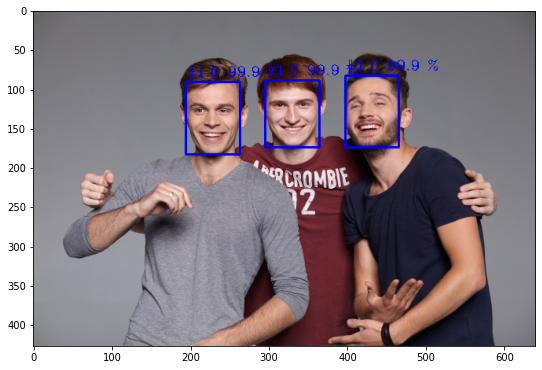

In [4]:
model = build_object_detection_model(name='face_detector_0100', draw=True)
frame = cv2.imread('../data/test/multi_person.jpg')
frames = [frame]
results = model.compute(frames)
plt.figure(figsize=(9, 16))
plt.imshow(results[0]['image'][:,:,::-1])
plt.show()

In [5]:
frame = cv2.imread('../data/test/multi_person.jpg')

In [6]:
face_images = []
for det in results[0]['output']:
    _, class_id, conf, xmin, ymin, xmax, ymax = det
    xmin = int(xmin)
    ymin = int(ymin)
    xmax = int(xmax)
    ymax = int(ymax)
    face_image = frame[ymin:ymax, xmin:xmax]
    face_images.append(face_image)

## Face age gender recognition

In [7]:
from pyvino.model import build_face_recognition_model

2020-06-06 15:59:34,691 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:34,692 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 15:59:34,701 - pyvino.model.openvino_model.openvino_model - INFO - Loading model to the plugin
2020-06-06 15:59:34,753 - pyvino.model.openvino_model.openvino_model - INFO - Preparing inputs
2020-06-06 15:59:34,755 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:34,756 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 15:59:34,767 - pyvino.model.openvino_model.openvino_model - INFO - Loading model to the plugin
2020-06-06 15:59:34,825 - pyvino.model.openvino_model.openvino_model - INFO - Preparing inputs
2020-06-06 15:59:34,827 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:34,828 - pyvino.model.openvino_model.openvino_model - INFO - Loading net

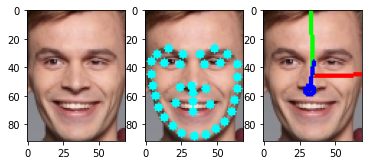

{'age': 26.4, 'gender': 'Male', 'gender_plob': 0.95101917}
{'emotion': 'happy', 'emotion_prob': 0.99616444}


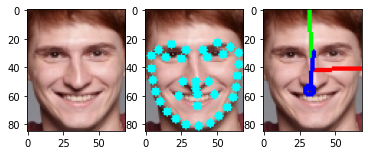

{'age': 29.1, 'gender': 'Male', 'gender_plob': 0.93922067}
{'emotion': 'happy', 'emotion_prob': 0.99694353}


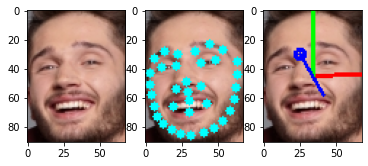

{'age': 23.1, 'gender': 'Male', 'gender_plob': 0.9951976}
{'emotion': 'happy', 'emotion_prob': 0.8795106}


In [8]:
face_age_gender_model = build_face_recognition_model(name='face_age_gender', draw=True)
emotion_model = build_face_recognition_model(name='emotion')
facial_landmark_model = build_face_recognition_model(name='facial_landmark', draw=True)
head_pose_model = build_face_recognition_model(name='head_pose', draw=True)

for plot_num, face_image in enumerate(face_images, 1):
    plt.subplot(1, 3, 1)
    plt.imshow(face_image[:,:,::-1])
    
    face_age_gender_results = face_age_gender_model.compute(face_image)
    emotion_results = emotion_model.compute(face_image)
    facial_landmark_results = facial_landmark_model.compute(face_image.copy())
    head_pose_results = head_pose_model.compute(face_image.copy())
    
    plt.subplot(1, 3, 2)
    plt.imshow(facial_landmark_results[0]['image'][:,:,::-1])
    plt.subplot(1, 3, 3)
    plt.imshow(head_pose_results[0]['image'][:,:,::-1])
    plt.show()
    
    
    print(face_age_gender_results[0])
    print(emotion_results[0])
    
    
    

# Instance segmentation

In [9]:
from pyvino.model import build_instance_segmentation_model

## instance_segmentation_0010

2020-06-06 15:59:36,201 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:36,202 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 15:59:36,693 - pyvino.model.openvino_model.openvino_model - INFO - Loading model to the plugin
2020-06-06 15:59:38,936 - pyvino.model.openvino_model.openvino_model - INFO - Preparing inputs


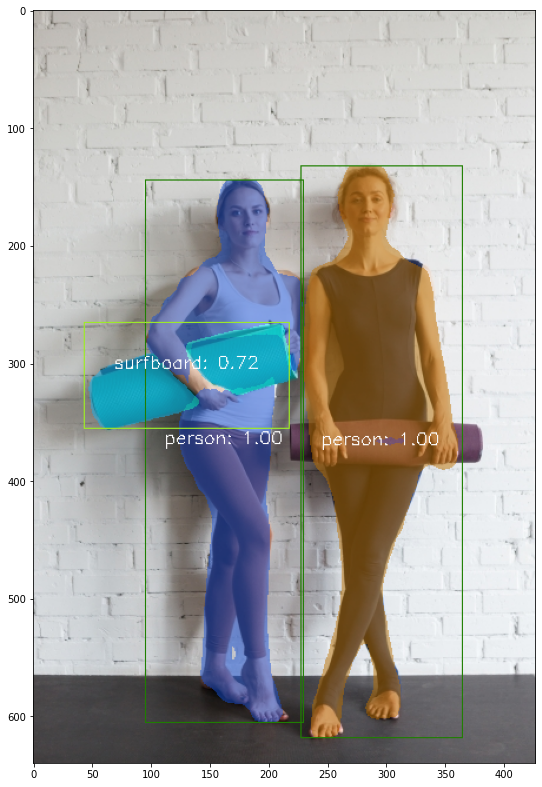

In [10]:
model = build_instance_segmentation_model(name='instance_segmentation_0010', draw=True)
frame = cv2.imread('../data/test/person1.jpg')
frames = [frame]
results = model.compute(frames)
plt.figure(figsize=(9, 16))
plt.imshow(results[0]['image'][:,:,::-1])
plt.show()

# object_detection

In [11]:
from pyvino.model import build_object_detection_model

## yolo_v3

2020-06-06 15:59:42,048 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:42,050 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 15:59:42,231 - pyvino.model.openvino_model.openvino_model - INFO - Loading model to the plugin
2020-06-06 15:59:43,103 - pyvino.model.openvino_model.openvino_model - INFO - Preparing inputs
../pyvino/model/object_detection/yolo_v3/yolo_v3.py:68: DeprecationWarning: shape property of IENetLayer is deprecated. Please use shape property of DataPtr instead objects returned by in_data or out_data property to access shape of input or output data on corresponding ports
  out_blob = out_blob.reshape(self.net.layers[self.net.layers[layer_name].parents[0]].shape)
../pyvino/model/object_detection/yolo_v3/yolo_v3.py:68: DeprecationWarning: shape property of IENetLayer is deprecated. Please use shape property of DataPtr instead objects returned by in_data or out_data property to access shap

To close the application, press 'CTRL+C' here or switch to the output window and press ESC key
To switch between sync/async modes, press TAB key in the output window


../pyvino/model/object_detection/yolo_v3/yolo_v3.py:68: DeprecationWarning: shape property of IENetLayer is deprecated. Please use shape property of DataPtr instead objects returned by in_data or out_data property to access shape of input or output data on corresponding ports
  out_blob = out_blob.reshape(self.net.layers[self.net.layers[layer_name].parents[0]].shape)


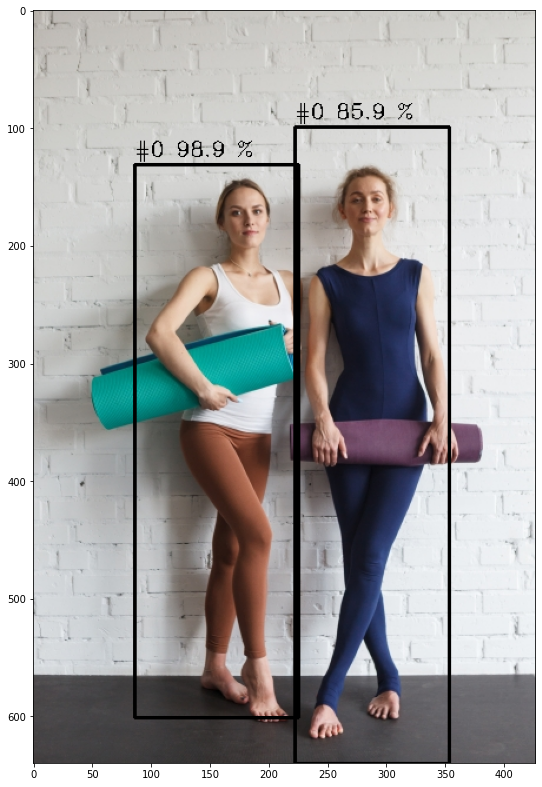

In [12]:
model = build_object_detection_model(draw=True)
frame = cv2.imread('../data/test/person1.jpg')
frames = [frame]
results = model.compute(frames)
plt.figure(figsize=(9, 16))
plt.imshow(results[0]['image'][:,:,::-1])
plt.show()

## person_detection

2020-06-06 15:59:43,716 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:43,717 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 15:59:43,760 - pyvino.model.openvino_model.openvino_model - INFO - Loading model to the plugin
2020-06-06 15:59:44,528 - pyvino.model.openvino_model.openvino_model - INFO - Preparing inputs


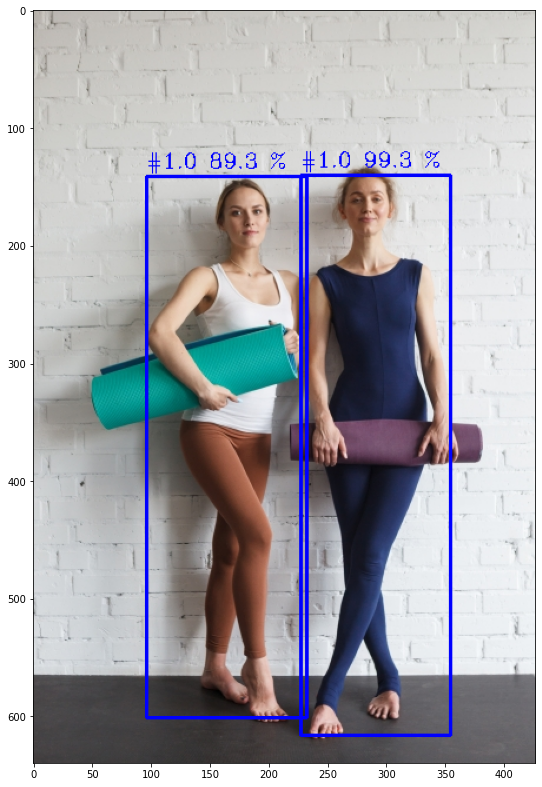

In [13]:
model = build_object_detection_model(name='person_detector', draw=True)
frame = cv2.imread('../data/test/person1.jpg')
frames = [frame]
results = model.compute(frames)
plt.figure(figsize=(9, 16))
plt.imshow(results[0]['image'][:,:,::-1])
plt.show()

# pose_estimation

In [14]:
from pyvino.model import build_pose_estimation_model

2020-06-06 15:59:44,958 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:44,959 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 15:59:44,967 - pyvino.model.openvino_model.openvino_model - INFO - Loading model to the plugin
2020-06-06 15:59:45,176 - pyvino.model.openvino_model.openvino_model - INFO - Preparing inputs
2020-06-06 15:59:45,190 - pyvino.model.pose_estimation.pose_3d_estimation.pose_3d_estimator - INFO - Starting inference...


To close the application, press 'CTRL+C' here or switch to the output window and press ESC key
To switch between sync/async modes, press TAB key in the output window


2020-06-06 15:59:45,392 - pyvino.model.pose_estimation.pose_3d_estimation.pose_3d_estimator - INFO - resized_shape is (1, 3, 256, 168)
2020-06-06 15:59:45,393 - pyvino.model.pose_estimation.pose_3d_estimation.pose_3d_estimator - INFO - det time 0.0 ms


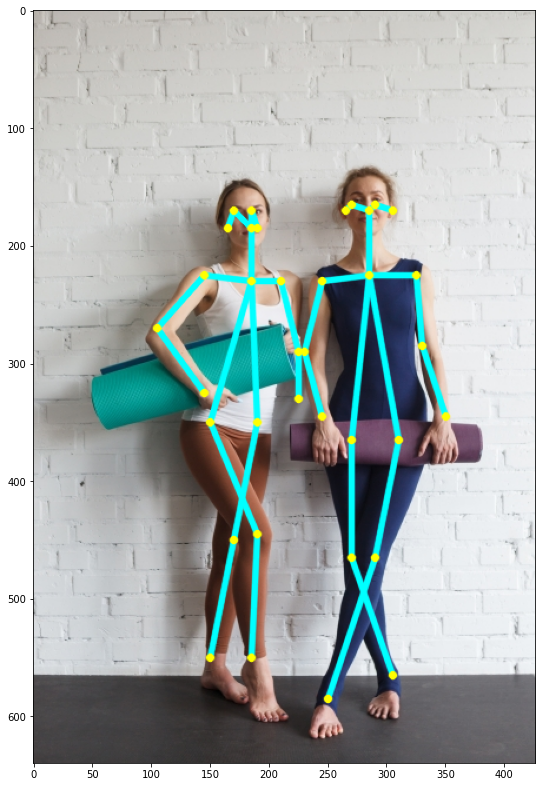

In [15]:
model = build_pose_estimation_model(draw=True)
frame = cv2.imread('../data/test/person1.jpg')
frames = [frame]
results = model.compute(frames)
plt.figure(figsize=(9, 16))
plt.imshow(results[0]['image'][:,:,::-1])
plt.show()

# Person reidentification

In [16]:
from pyvino.model import build_person_reidentification_model

In [17]:
model = build_person_reidentification_model()
frame = cv2.imread('../data/test/single_person.png')
frames = [frame]
results = model.compute(frames)
len(results[0]['output'])

2020-06-06 15:59:45,840 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:45,842 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 15:59:45,860 - pyvino.model.openvino_model.openvino_model - INFO - Loading model to the plugin
2020-06-06 15:59:46,144 - pyvino.model.openvino_model.openvino_model - INFO - Preparing inputs


256

In [18]:
model = build_person_reidentification_model(name='face_reid_0095')
frame = cv2.imread('../data/test/single_person.png')
frames = [frame]
results = model.compute(frames)
len(results[0]['output'])

2020-06-06 15:59:55,020 - pyvino.model.openvino_model.openvino_model - INFO - download model from https://download.01.org/opencv/2020/openvinotoolkit/2020.3/open_model_zoo/models_bin/1/face-reidentification-retail-0095/FP32/face-reidentification-retail-0095.xml and save to /home/ubuntu/.pyvino/face-reidentification-retail-0095/FP32/face-reidentification-retail-0095.xml
2020-06-06 15:59:55,539 - pyvino.model.openvino_model.openvino_model - INFO - download model from https://download.01.org/opencv/2020/openvinotoolkit/2020.3/open_model_zoo/models_bin/1/face-reidentification-retail-0095/FP32/face-reidentification-retail-0095.bin and save to /home/ubuntu/.pyvino/face-reidentification-retail-0095/FP32/face-reidentification-retail-0095.bin
2020-06-06 15:59:55,540 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 15:59:55,541 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 15:59:55,567 - pyvino.model.openvino_model.o

256

# Super resolution

In [19]:
from pyvino.model import build_super_resolution_model

In [20]:
model = build_super_resolution_model()

frame = cv2.imread('../data/test/person1.jpg')
# frames = [frame, frame]
frames = [frame]
results = model.compute(frames)
results[0]['output']
# TODO: Not Implemented

# data = results[0]['output']
# plt.imshow(results[0]['image'][:,:,::-1])
# plt.show()

2020-06-06 16:00:02,954 - pyvino.model.openvino_model.openvino_model - INFO - Creating Inference Engine...
2020-06-06 16:00:02,960 - pyvino.model.openvino_model.openvino_model - INFO - Loading network
2020-06-06 16:00:02,972 - pyvino.model.openvino_model.openvino_model - INFO - Loading model to the plugin
2020-06-06 16:00:05,370 - pyvino.model.openvino_model.openvino_model - INFO - Preparing inputs


array([[[ 9.5834817e+22,  6.8199127e+01,  2.9066170e+20, ...,
          0.0000000e+00,  0.0000000e+00, -2.9353036e-03],
        [ 1.2145593e+25,  1.2051167e-43,  1.2145575e+25, ...,
          1.2051167e-43,  0.0000000e+00,  3.5319154e-03],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -7.5770259e+00, -7.9767895e+00, -9.9633858e-03],
        ...,
        [ 1.5539711e-03,  7.7754137e-04,  7.3160167e-04, ...,
          1.6291068e-01,  1.6949295e-01,  2.0878267e-01],
        [ 2.0124878e-01,  1.9735208e-01,  2.0189048e-01, ...,
         -2.0427897e-03, -1.4388242e-03, -2.4291186e-03],
        [-2.9638689e-03,  7.2915358e-03,  1.4641277e-02, ...,
          2.3554130e-01,  2.4313380e-01,  2.8529078e-01]],

       [[ 3.4329758e+01,  7.2768646e+01,  2.4313727e-01, ...,
          0.0000000e+00,  0.0000000e+00, -3.1825867e-03],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  4.3815169e-03],
        [ 0.0000000e+00, 